# 1 - Chi-squared

https://web.pdx.edu/~newsomj/pa551/lectur11.htm

scipy.stats.chi2_contingency is weird.

In [21]:
import numpy as np
import pandas as pd

# 50 democrats female
# 70 democrats male
# 19 republicans female
# 41 republicans female
sex = np.concatenate([np.array(['Female' for _ in range(50)]),
                       np.array(['Male' for _ in range(70)]),
                       np.array(['Female' for _ in range(19)]),
                       np.array(['Male' for _ in range(41)])])
party = np.concatenate([np.array(['Democrats' for _ in range(50)]),
                        np.array(['Democrats' for _ in range(70)]),
                        np.array(['Republicans' for _ in range(19)]),
                        np.array(['Republicans' for _ in range(41)])])
df = pd.DataFrame(data={'sex': sex, 'party': party})
contingency_table = pd.crosstab(df['party'], df['sex'])
contingency_table

sex,Female,Male
party,,
Democrats,50,70
Republicans,19,41


In [25]:
from sklearn.preprocessing import LabelEncoder
df2 = df.apply(LabelEncoder().fit_transform)
df2

,sex,party
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
175,1,1
176,1,1
177,1,1
178,1,1


In [30]:
from scipy.stats import chi2_contingency

chi2_contingency(observed=contingency_table)

(1.2955346650998825,
 0.2550304821631105,
 1,
 array([[46., 74.],
        [23., 37.]]))

In [51]:
from sklearn.feature_selection import chi2

chi2(df2['sex'].values.reshape(-1,1), df2['party'])

(array([0.00169377]), array([0.96717201]))

## 1.1 - another chi square

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [37]:
# 10 democrats female
# 20 democrats male
# 30 democrats other
# 6 republicans female
# 9 republicans male
# 17 republicans other
sex = np.concatenate([['Female' for _ in range(10)],
                      ['Male' for _ in range(20)],
                      ['Other' for _ in range(30)],
                      ['Female' for _ in range(6)],
                      ['Male' for _ in range(9)],
                      ['Other' for _ in range(17)]])
party = np.concatenate([['Democrats' for _ in range(10)],
                        ['Democrats' for _ in range(20)],
                        ['Democrats' for _ in range(30)],
                        ['Republicans' for _ in range(6)],
                        ['Republicans' for _ in range(9)],
                        ['Republicans' for _ in range(17)]])
df = pd.DataFrame({'sex': sex, 'party': party})
df2 = df.apply(LabelEncoder().fit_transform)

In [39]:
contingency_table = pd.crosstab(df['party'], df['sex'])
contingency_table

sex,Female,Male,Other
party,,,
Democrats,10,20,30
Republicans,6,9,17


In [40]:
chi2_contingency(observed=contingency_table)

(0.27157465150403504,
 0.873028283380073,
 2,
 array([[10.43478261, 18.91304348, 30.65217391],
        [ 5.56521739, 10.08695652, 16.34782609]]))

In [48]:
chi2(X=df2[['sex']], y=df2['party'])

(array([0.00169377]), array([0.96717201]))

## 2 - SelectFromModel

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

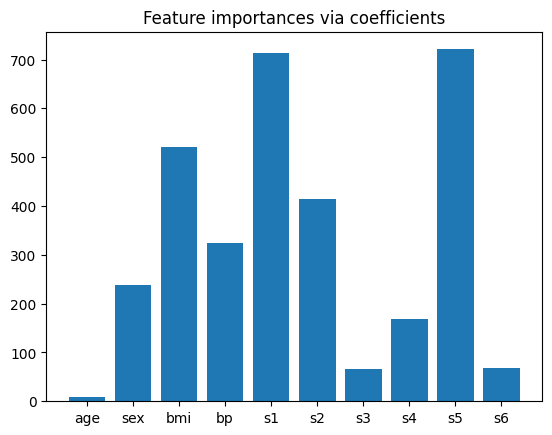

In [9]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(diabetes.data, diabetes.target)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [12]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge).fit(diabetes.data, diabetes.target)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['bmi' 's1' 's2' 's5']
Done in 0.002s


In [24]:
feature_names[[False, False,  True, False,  True,  True, False, False,  True, False]]

array(['bmi', 's1', 's2', 's5'], dtype='<U3')

In [25]:
sfm.get_feature_names_out()

array(['x2', 'x4', 'x5', 'x8'], dtype=object)